In [1]:
# Cell 1: Import libraries for Task 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Task 2: Quantitative Analysis Started!")

✅ Task 2: Quantitative Analysis Started!


In [2]:
# Cell 2: Load all stock data files
import glob

# Get all stock CSV files
stock_files = glob.glob('../data/*.csv')
stock_files = [f for f in stock_files if 'raw_analyst_ratings' not in f]  # Exclude news data

print("📈 Stock files found:")
for file in stock_files:
    print(f" - {file}")

# Load all stock data into a dictionary
stock_data = {}
for file in stock_files:
    stock_name = file.split('\\')[-1].replace('.csv', '')  # Extract stock name (Windows path)
    stock_data[stock_name] = pd.read_csv(file)
    print(f"✅ Loaded {stock_name}: {stock_data[stock_name].shape}")

📈 Stock files found:
 - ../data\AAPL.csv
 - ../data\AMZN.csv
 - ../data\GOOG.csv
 - ../data\META.csv
 - ../data\MSFT.csv
 - ../data\NVDA.csv
✅ Loaded AAPL: (3774, 6)
✅ Loaded AMZN: (3774, 6)
✅ Loaded GOOG: (3774, 6)
✅ Loaded META: (2923, 6)
✅ Loaded MSFT: (3774, 6)
✅ Loaded NVDA: (3774, 6)


In [3]:
# Cell 3: Examine one stock's data structure
first_stock = list(stock_data.keys())[0]
print(f"📊 Examining {first_stock} data:")
print(stock_data[first_stock].columns.tolist())
print(f"Shape: {stock_data[first_stock].shape}")
print("\nFirst 5 rows:")
stock_data[first_stock].head()

📊 Examining AAPL data:
['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Shape: (3774, 6)

First 5 rows:


,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [4]:
# Cell 4: Check data types and missing values for all stocks
for stock_name, df in stock_data.items():
    print(f"\n🔍 {stock_name} Analysis:")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"Shape: {df.shape}")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"Missing values: {missing[missing > 0]}")


🔍 AAPL Analysis:
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2009-01-02 to 2023-12-29
Shape: (3774, 6)

🔍 AMZN Analysis:
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2009-01-02 to 2023-12-29
Shape: (3774, 6)

🔍 GOOG Analysis:
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2009-01-02 to 2023-12-29
Shape: (3774, 6)

🔍 META Analysis:
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2012-05-18 to 2023-12-29
Shape: (2923, 6)

🔍 MSFT Analysis:
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2009-01-02 to 2023-12-29
Shape: (3774, 6)

🔍 NVDA Analysis:
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2009-01-02 to 2023-12-29
Shape: (3774, 6)


In [5]:
# Cell 5: Calculate Moving Averages and RSI manually
def calculate_technical_indicators(df):
    """Calculate basic technical indicators using pandas"""
    df = df.copy()
    
    # Convert Date to datetime and sort
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    
    # Calculate returns
    df['Daily_Return'] = df['Close'].pct_change() * 100
    
    # Moving Averages
    df['MA_20'] = df['Close'].rolling(window=20).mean()  # 20-day Moving Average
    df['MA_50'] = df['Close'].rolling(window=50).mean()  # 50-day Moving Average
    
    # RSI (Relative Strength Index) - manual calculation
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # MACD (Moving Average Convergence Divergence)
    exp1 = df['Close'].ewm(span=12).mean()
    exp2 = df['Close'].ewm(span=26).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9).mean()
    df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']
    
    return df

# Apply to all stocks
print("📊 Calculating technical indicators for all stocks...")
for stock_name in stock_data.keys():
    stock_data[stock_name] = calculate_technical_indicators(stock_data[stock_name])
    print(f"✅ {stock_name}: Indicators calculated")

📊 Calculating technical indicators for all stocks...
✅ AAPL: Indicators calculated
✅ AMZN: Indicators calculated
✅ GOOG: Indicators calculated
✅ META: Indicators calculated
✅ MSFT: Indicators calculated
✅ NVDA: Indicators calculated


In [6]:
# Cell 6: Verify indicators were calculated
print("🔍 Sample of AAPL with technical indicators:")
sample_aapl = stock_data['AAPL'].tail()[['Date', 'Close', 'Daily_Return', 'MA_20', 'MA_50', 'RSI', 'MACD']]
print(sample_aapl)

🔍 Sample of AAPL with technical indicators:
           Date       Close  Daily_Return       MA_20       MA_50        RSI  \
3769 2023-12-22  191.788757     -0.554751  191.856618  183.572859  59.246127   
3770 2023-12-26  191.243912     -0.284086  192.018094  183.858864  49.031899   
3771 2023-12-27  191.342972      0.051798  192.154308  184.149424  52.291510   
3772 2023-12-28  191.768951      0.222626  192.362839  184.479567  47.920425   
3773 2023-12-29  190.728775     -0.542411  192.490633  184.814828  40.185234   

          MACD  
3769  2.633141  
3770  2.304751  
3771  2.029104  
3772  1.823998  
3773  1.559539  


📈 AAPL Technical Analysis:


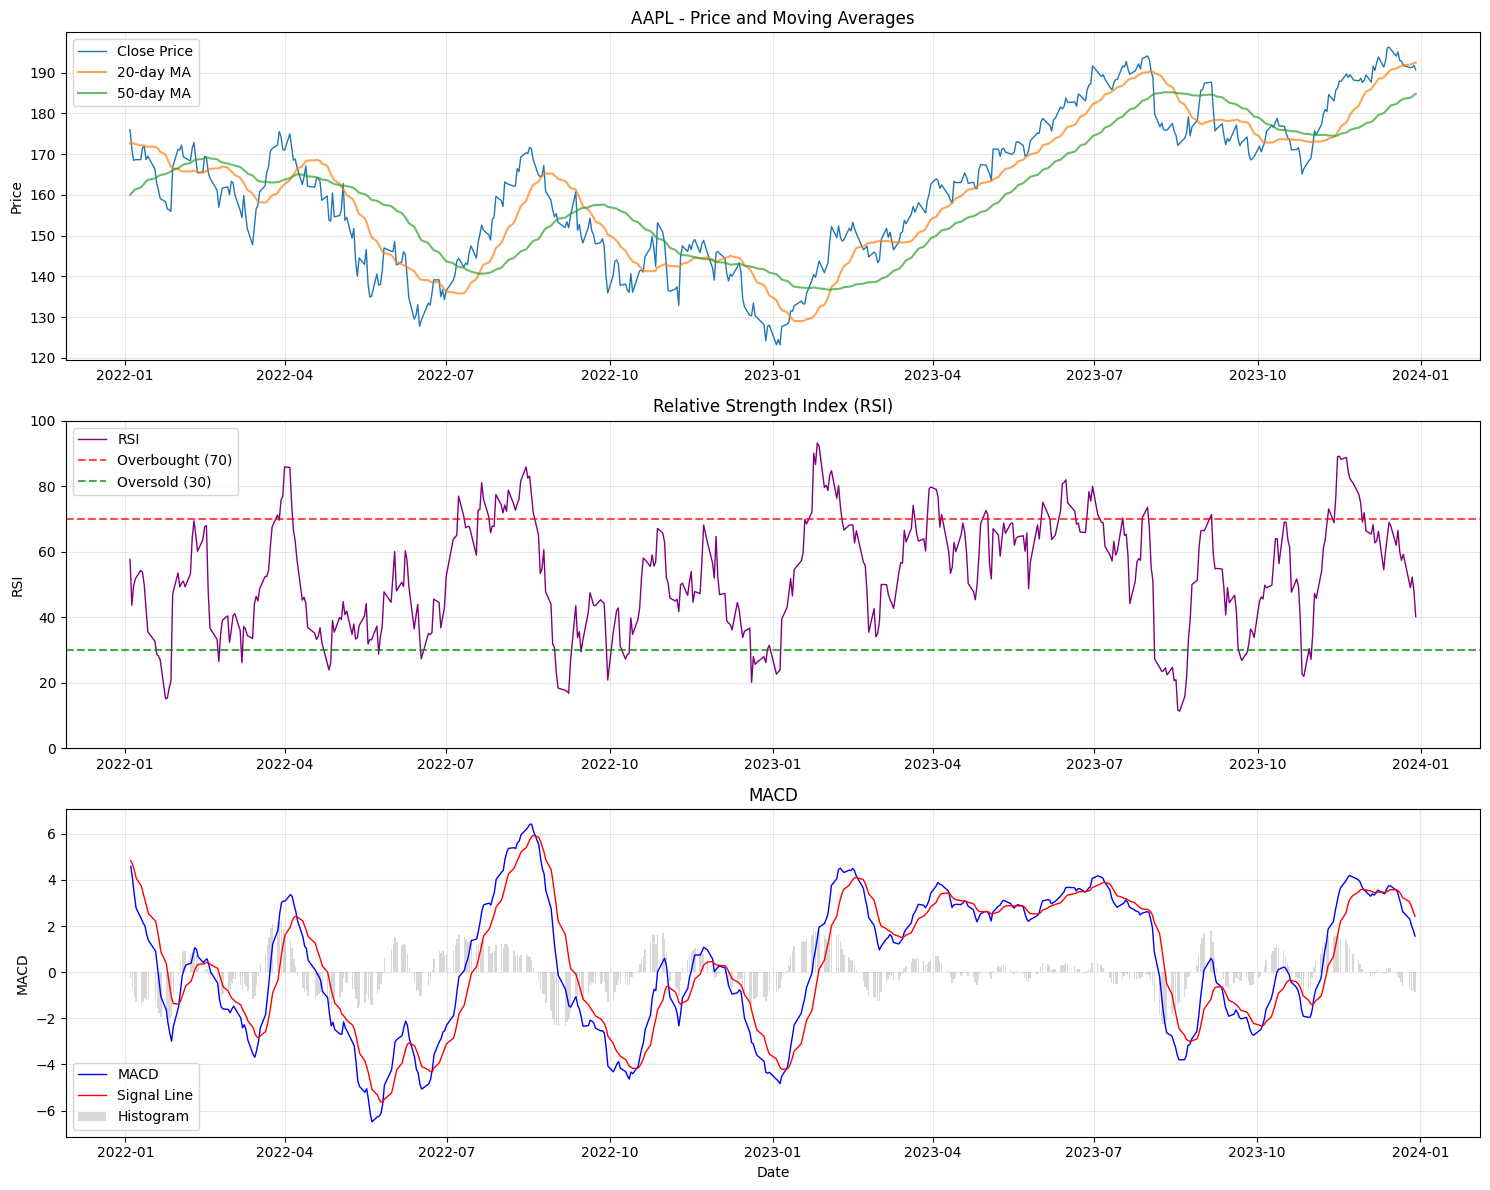

In [7]:
# Cell 7: Create comprehensive stock visualization for one stock
def plot_stock_analysis(stock_name, df):
    """Create a comprehensive stock analysis plot"""
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Plot 1: Price and Moving Averages
    axes[0].plot(df['Date'], df['Close'], label='Close Price', linewidth=1)
    axes[0].plot(df['Date'], df['MA_20'], label='20-day MA', alpha=0.7)
    axes[0].plot(df['Date'], df['MA_50'], label='50-day MA', alpha=0.7)
    axes[0].set_title(f'{stock_name} - Price and Moving Averages')
    axes[0].set_ylabel('Price')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: RSI
    axes[1].plot(df['Date'], df['RSI'], label='RSI', color='purple', linewidth=1)
    axes[1].axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
    axes[1].axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
    axes[1].set_title('Relative Strength Index (RSI)')
    axes[1].set_ylabel('RSI')
    axes[1].set_ylim(0, 100)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: MACD
    axes[2].plot(df['Date'], df['MACD'], label='MACD', color='blue', linewidth=1)
    axes[2].plot(df['Date'], df['MACD_Signal'], label='Signal Line', color='red', linewidth=1)
    axes[2].bar(df['Date'], df['MACD_Histogram'], label='Histogram', alpha=0.3, color='gray')
    axes[2].set_title('MACD')
    axes[2].set_ylabel('MACD')
    axes[2].set_xlabel('Date')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot for AAPL
print("📈 AAPL Technical Analysis:")
plot_stock_analysis('AAPL', stock_data['AAPL'].tail(500))  # Last 500 days for clarity

In [8]:
# Cell 8: Calculate volatility and performance metrics
def calculate_performance_metrics(stock_data):
    """Calculate key performance metrics for all stocks"""
    performance_data = []
    
    for stock_name, df in stock_data.items():
        # Basic metrics
        current_price = df['Close'].iloc[-1]
        start_price = df['Close'].iloc[0]
        total_return = ((current_price - start_price) / start_price) * 100
        
        # Volatility (standard deviation of daily returns)
        volatility = df['Daily_Return'].std()
        
        # Sharpe Ratio (assuming risk-free rate = 0 for simplicity)
        sharpe_ratio = df['Daily_Return'].mean() / volatility if volatility != 0 else 0
        
        performance_data.append({
            'Stock': stock_name,
            'Start_Price': round(start_price, 2),
            'Current_Price': round(current_price, 2),
            'Total_Return_%': round(total_return, 2),
            'Volatility_%': round(volatility, 2),
            'Sharpe_Ratio': round(sharpe_ratio, 2),
            'Data_Points': len(df)
        })
    
    return pd.DataFrame(performance_data)

# Calculate and display performance metrics
performance_df = calculate_performance_metrics(stock_data)
print("📊 Stock Performance Comparison:")
performance_df

📊 Stock Performance Comparison:


,Stock,Start_Price,Current_Price,Total_Return_%,Volatility_%,Sharpe_Ratio,Data_Points
0,AAPL,2.72,190.73,6907.74,1.80,0.07,3774
1,AMZN,2.72,151.94,5490.14,2.18,0.06,3774
2,GOOG,7.95,139.97,1660.96,1.73,0.05,3774
3,META,38.00,351.79,825.87,2.53,0.04,2923
4,MSFT,14.87,371.21,2395.86,1.69,0.06,3774
5,NVDA,0.20,49.50,24691.75,2.89,0.06,3774


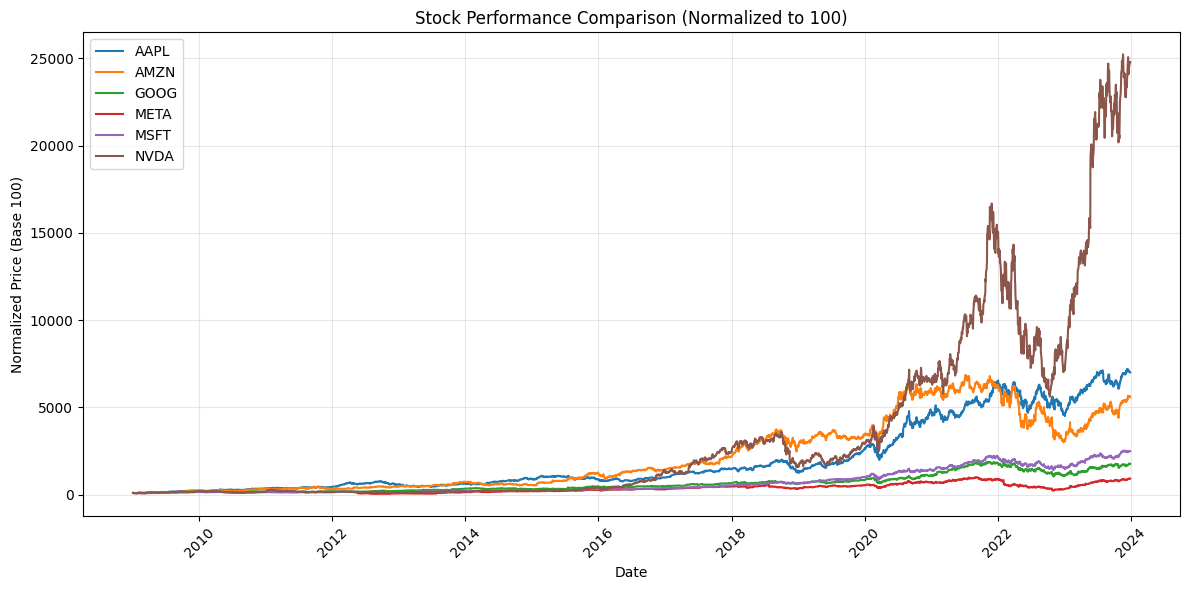

In [9]:
# Cell 9: Compare stock performance visually
plt.figure(figsize=(12, 6))

# Normalize prices to compare performance
for stock_name, df in stock_data.items():
    normalized_price = df['Close'] / df['Close'].iloc[0] * 100  # Normalize to 100 at start
    plt.plot(df['Date'], normalized_price, label=stock_name, linewidth=1.5)

plt.title('Stock Performance Comparison (Normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

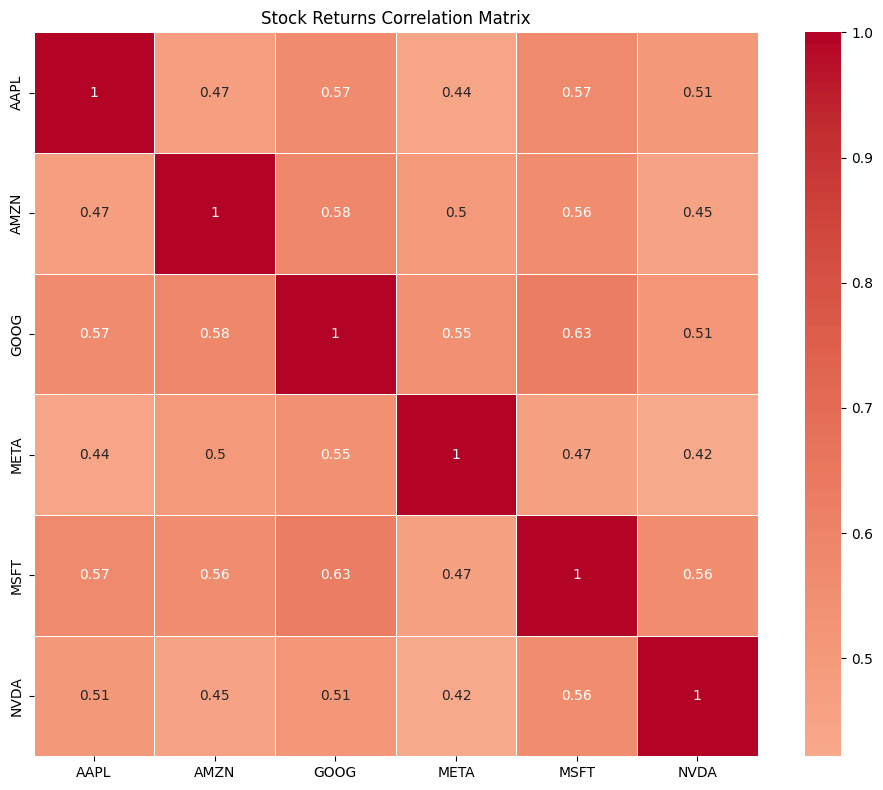

In [10]:
# Cell 10: Correlation analysis between stocks
# Calculate daily returns for correlation
returns_data = {}
for stock_name, df in stock_data.items():
    returns_data[stock_name] = df.set_index('Date')['Daily_Return']

# Create correlation matrix
returns_df = pd.DataFrame(returns_data)
correlation_matrix = returns_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Stock Returns Correlation Matrix')
plt.tight_layout()
plt.show()